In [ ]:
from google.colab import files
import io
import pandas as pd

print("upload physichem properties file:")
uploaded_phy = files.upload()
phy_file = list(uploaded_phy.keys())[0]

df_phy = pd.read_excel(io.BytesIO(uploaded_phy[phy_file]))
print("df_phy:", df_phy.head())

print("upload the topological indices file:")
uploaded_topo = files.upload()
topo_file = list(uploaded_topo.keys())[0]

df_topo = pd.read_excel(io.BytesIO(uploaded_topo[topo_file]))
print("df_topo:", df_topo.head())

فایل فیزیکی را آپلود کنید:


Saving Pyhsicalproperties.xlsx to Pyhsicalproperties (2).xlsx
df_phy:             DRUGS     BP     MV     MR     FP Polar    EV
0  chlorpromazine  450.1  262.9   92.8    226  36.8  70.9
1    Triphthasine    506  328.8  108.2  259.8  42.9  77.6
2    thioridazine  515.7  299.6  112.8  265.7  44.7  78.8
3     thiothixene    599  349.4  126.5  316.1  50.1  89.2
4     haloperidol    529  303.3    101  273.8    40  84.6
فایل توپولوژیک را آپلود کنید:


Saving TIsAN.xlsx to TIsAN (1).xlsx
df_topo:             DRUGS       Wiener           DD         RDD       Gutman  \
0  chlorpromazine   789.344538  2767.133318  324.992728  2402.633987   
1    Triphthasine  1871.660714  6594.529873  474.354573  5771.148465   
2    thioridazine  1276.571429  4662.810689  422.685174  4232.809279   
3     thiothixene  2056.674107  6733.051504  537.224922  5414.805866   
4     haloperidol  1939.615196  7250.810838  390.337463  6760.941617   

          TEI         ECI   Balaban     Harary  
0  143.870798  256.444407  1.924900  43.530570  
1  268.660714  479.054026  1.548202  63.332854  
2  193.928571  355.186771  1.642887  56.580565  
3  280.781250  456.707890  1.704084  87.030993  
4  317.427521  599.163020  1.383992  50.328502  


In [ ]:
# Reading Excel Files
df_topo = pd.read_excel("TIsAN.xlsx")
df_phy = pd.read_excel("Pyhsicalproperties.xlsx")

# remove the extra distance DataFrame
df_topo.columns = df_topo.columns.str.strip()
df_phy.columns = df_phy.columns.str.strip()


print("Topological Data:")
print(df_topo.head())
print("\nPhysicochemical Properties:")
print(df_phy.head())

# Combining Two DataFrames Based on the Common 'Drug Name' Column
df_merged = pd.merge(df_topo, df_phy, on="DRUGS", how="inner")


# save the combine data as CSV
df_merged.to_csv("merged_drug_data.csv", index=False)
print("داده‌های ترکیبی در فایل merged_drug_data.csv ذخیره شدند.")


Topological Data:
            DRUGS       Wiener           DD         RDD       Gutman  \
0  chlorpromazine   789.344538  2767.133318  324.992728  2402.633987   
1    Triphthasine  1871.660714  6594.529873  474.354573  5771.148465   
2    thioridazine  1276.571429  4662.810689  422.685174  4232.809279   
3     thiothixene  2056.674107  6733.051504  537.224922  5414.805866   
4     haloperidol  1939.615196  7250.810838  390.337463  6760.941617   

          TEI         ECI   Balaban     Harary  
0  143.870798  256.444407  1.924900  43.530570  
1  268.660714  479.054026  1.548202  63.332854  
2  193.928571  355.186771  1.642887  56.580565  
3  280.781250  456.707890  1.704084  87.030993  
4  317.427521  599.163020  1.383992  50.328502  

Physicochemical Properties:
            DRUGS     BP     MV     MR     FP Polar    EV
0  chlorpromazine  450.1  262.9   92.8    226  36.8  70.9
1    Triphthasine    506  328.8  108.2  259.8  42.9  77.6
2    thioridazine  515.7  299.6  112.8  265.7  44.7 

In [ ]:
# define the lists topo_features and physicochem_features
topo_features = [col for col in df_topo.columns if col != 'DRUGS']
physicochem_features = [col for col in df_phy.columns if col != 'DRUGS']

# Replacing Commas with dots in Numeric Columns
for col in topo_features + physicochem_features:
    df_merged[col] = df_merged[col].astype(str).str.replace(',', '.').astype(float)





پردازش BP...

TrainLinear Regression for BP...

Feature coefficients:
Wiener: -0.7053
RDD: 0.1060
TEI: 1.6706
ECI: -1.1059
Harary: 0.8495

TrainLASSO Regression for BP...

Feature coefficients:
Wiener: -0.3399
RDD: 0.0000
TEI: 0.3723
ECI: 0.0000
Harary: 0.7787

TrainRidge Regression for BP...

Feature coefficients:
Wiener: -0.7023
RDD: 0.0934
TEI: 1.6379
ECI: -1.0744
Harary: 0.8606

Features selected for BP:
['Wiener', 'RDD', 'TEI', 'ECI', 'Harary']
--------------------------------------------------

پردازش MV...

TrainLinear Regression for MV...

Feature coefficients:
DD: -0.2040
RDD: 0.4576
TEI: 0.3577
ECI: 0.2953
Harary: 0.0723

TrainLASSO Regression for MV...

Feature coefficients:
DD: -0.0000
RDD: 0.4264
TEI: 0.2540
ECI: 0.2853
Harary: 0.0000

TrainRidge Regression for MV...

Feature coefficients:
DD: -0.2037
RDD: 0.4552
TEI: 0.3545
ECI: 0.2983
Harary: 0.0746

Features selected for MV:
['DD', 'RDD', 'TEI', 'ECI', 'Harary']
--------------------------------------------------

پرداز

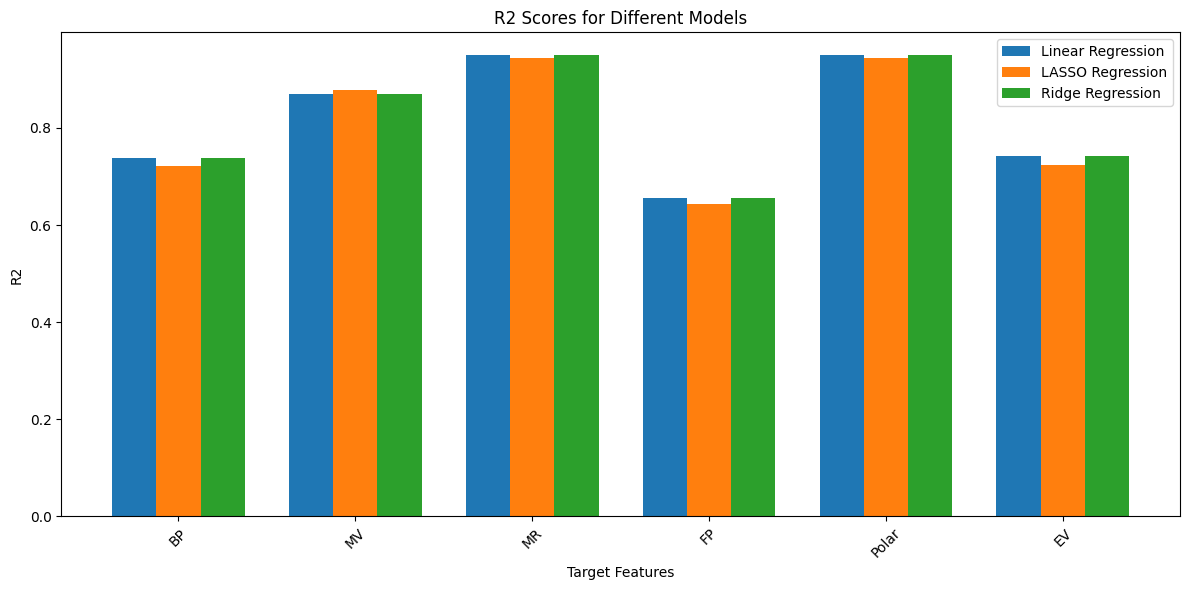

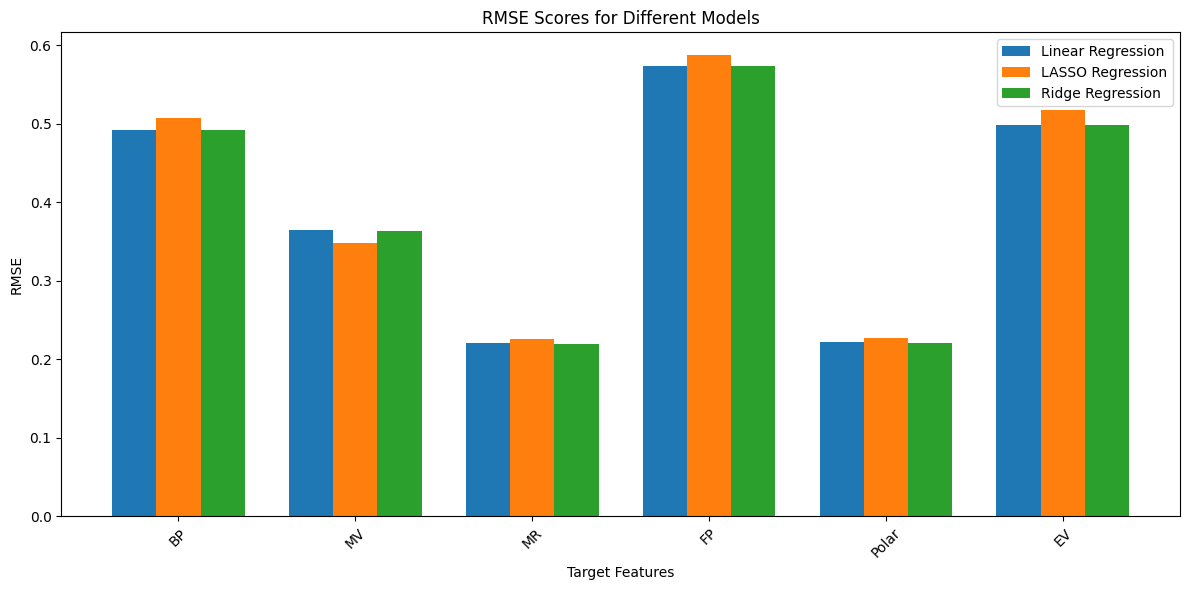

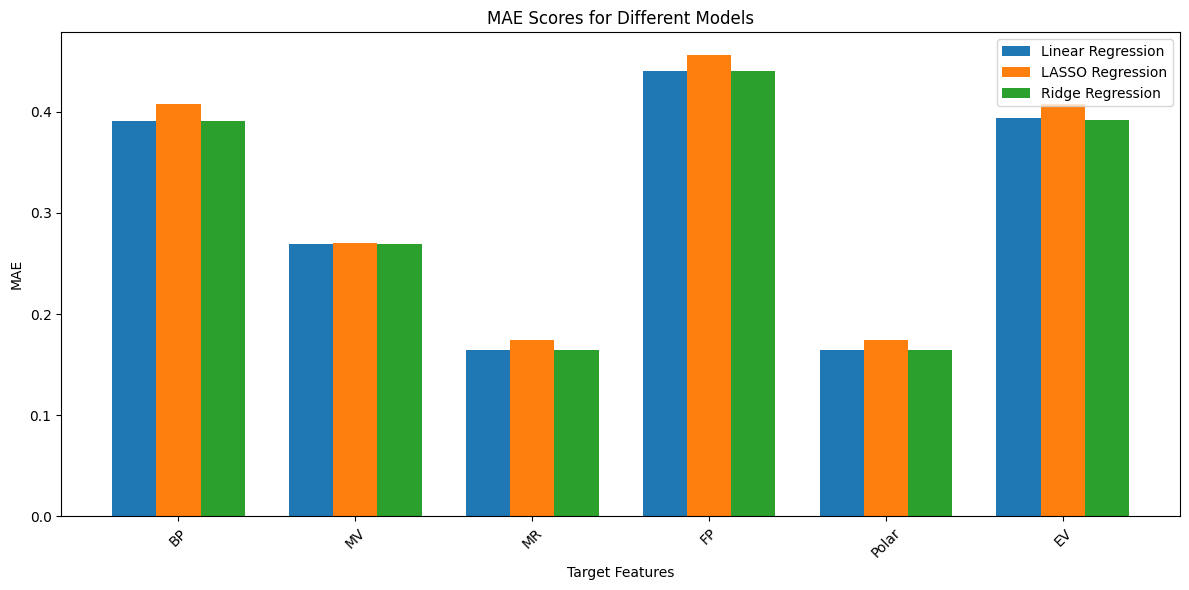

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Define Properties
topo_features = ["Wiener", "DD", "RDD", "Gutman", "TEI", "ECI", "Balaban", "Harary"]
physicochem_features = ["BP", "MV", "MR", "FP", "Polar", "EV"]

# creat a dic
results = {}

# chart function
def plot_model_metrics(results, metric='R2'):
    plt.figure(figsize=(12, 6))
    targets = list(results.keys())
    models = list(results[targets[0]].keys())

    x = np.arange(len(targets))
    width = 0.25

    for i, model in enumerate(models):
        metrics = [results[target][model][metric] for target in targets]
        plt.bar(x + i*width, metrics, width, label=model)

    plt.xlabel('Target Features')
    plt.ylabel(metric)
    plt.title(f'{metric} Scores for Different Models')
    plt.xticks(x + width, targets, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# fill the blank data with KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_filled = df_merged.copy()
columns_to_impute = topo_features + physicochem_features
df_filled[columns_to_impute] = imputer.fit_transform(df_merged[columns_to_impute])

# proccesing for each target variable
for target_feature in physicochem_features:
    print(f"\nپردازش {target_feature}...")
    results[target_feature] = {}

    # separate features and target
    X = df_filled[topo_features]
    y = df_filled[target_feature]

    # skill data
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

    # division of data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_scaled, test_size=0.2, random_state=42
    )

    # selection of features
    selector = SelectKBest(f_regression, k=5)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # convert to DataFrame
    selected_features = np.array(topo_features)[selector.get_support()]
    X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
    X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

    # setting the parameters
    models = {
        'Linear Regression': LinearRegression(),
        'LASSO Regression': Lasso(alpha=0.01),
        'Ridge Regression': Ridge(alpha=0.01)
    }

    # model training
    for model_name, model in models.items():
        print(f"\nTrain{model_name} for {target_feature}...")

        # Cross-validation scores
        scores_rmse = np.sqrt(-cross_val_score(
            model, X_train_selected, y_train,
            cv=5, scoring='neg_mean_squared_error'
        )).mean()

        scores_mae = -cross_val_score(
            model, X_train_selected, y_train,
            cv=5, scoring='neg_mean_absolute_error'
        ).mean()

        scores_r2 = cross_val_score(
            model, X_train_selected, y_train,
            cv=5, scoring='r2'
        ).mean()

        # save results
        results[target_feature][model_name] = {
            'RMSE': scores_rmse,
            'MAE': scores_mae,
            'R2': scores_r2
        }

        # Training the model on the entire training data and displaying important features
        model.fit(X_train_selected, y_train)
        if hasattr(model, 'coef_'):
            print("\nFeature coefficients:")
            for feat, coef in zip(selected_features, model.coef_):
                print(f"{feat}: {coef:.4f}")

    print(f"\nFeatures selected for {target_feature}:")
    print(list(selected_features))
    print("-" * 50)

# display the final
print("\nFinal results:")
print("=" * 50)
for feature, models in results.items():
    print(f"\nresults for {feature}:")
    for model_name, metrics in models.items():
        print(f"  {model_name}:")
        print(f"    RMSE: {metrics['RMSE']:.4f}")
        print(f"    MAE: {metrics['MAE']:.4f}")
        print(f"    R2: {metrics['R2']:.4f}")
    print("-" * 50)

# draw the charts
plot_model_metrics(results, 'R2')
plot_model_metrics(results, 'RMSE')
plot_model_metrics(results, 'MAE')

# save results to DataFrame
results_df = pd.DataFrame.from_dict({(i,j): results[i][j]
                                    for i in results.keys()
                                    for j in results[i].keys()},
                                   orient='index')

# save results in the file
results_df.to_csv('regression_results.csv')

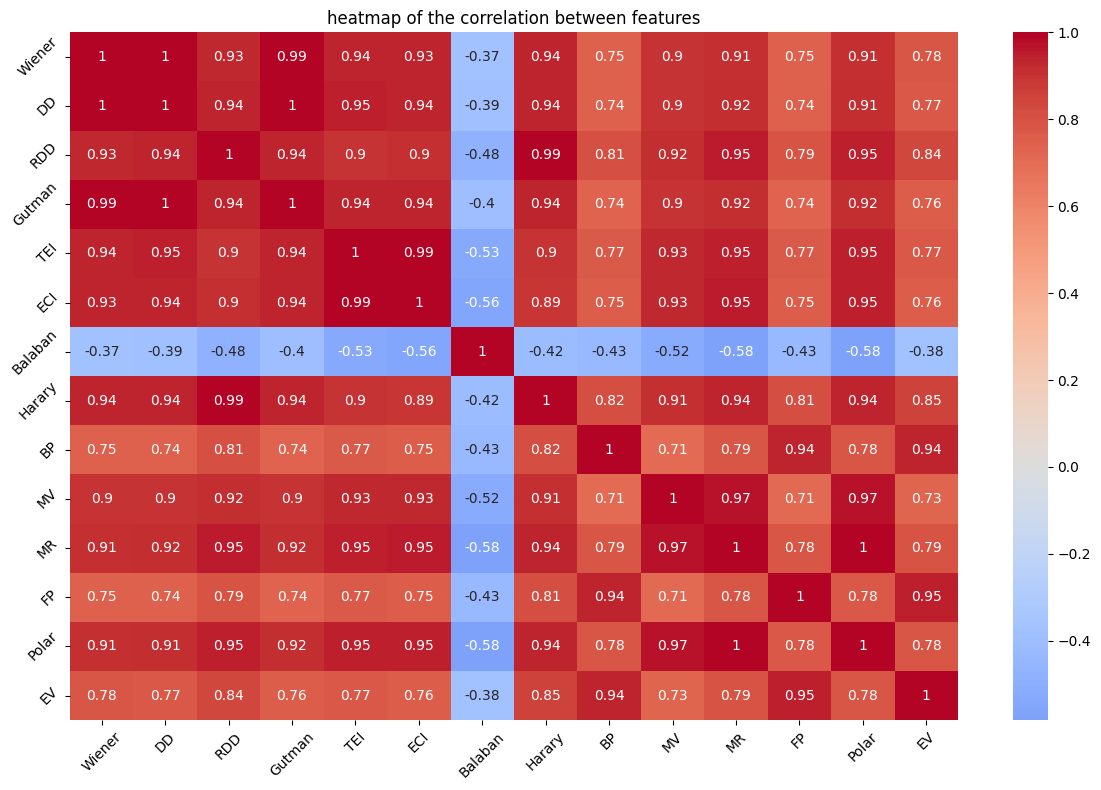

<Figure size 1200x600 with 0 Axes>

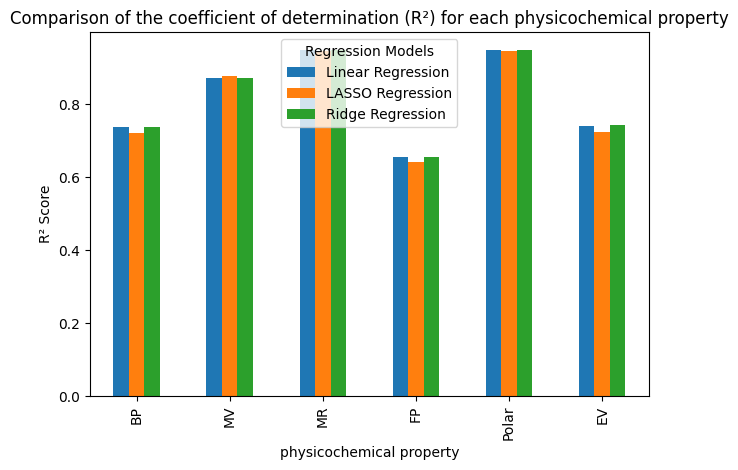


Comperihensive Analysis of Results:

Analysis forBP:
Best Model: Ridge Regression
R² Score: 0.7377
RMSE: 0.4920
MAE: 0.3905

The most important TIs Based on Corrolation:
Harary: 0.8183
RDD: 0.8054
TEI: 0.7655
------------------------------

Analysis forMV:
Best Model: LASSO Regression
R² Score: 0.8774
RMSE: 0.3476
MAE: 0.2706

The most important TIs Based on Corrolation:
ECI: 0.9273
TEI: 0.9259
RDD: 0.9161
------------------------------

Analysis forMR:
Best Model: Ridge Regression
R² Score: 0.9495
RMSE: 0.2201
MAE: 0.1641

The most important TIs Based on Corrolation:
RDD: 0.9514
ECI: 0.9514
TEI: 0.9468
------------------------------

Analysis forFP:
Best Model: Ridge Regression
R² Score: 0.6562
RMSE: 0.5738
MAE: 0.4399

The most important TIs Based on Corrolation:
Harary: 0.8101
RDD: 0.7903
TEI: 0.7694
------------------------------

Analysis forPolar:
Best Model: Ridge Regression
R² Score: 0.9495
RMSE: 0.2210
MAE: 0.1644

The most important TIs Based on Corrolation:
ECI: 0.9502
RDD:

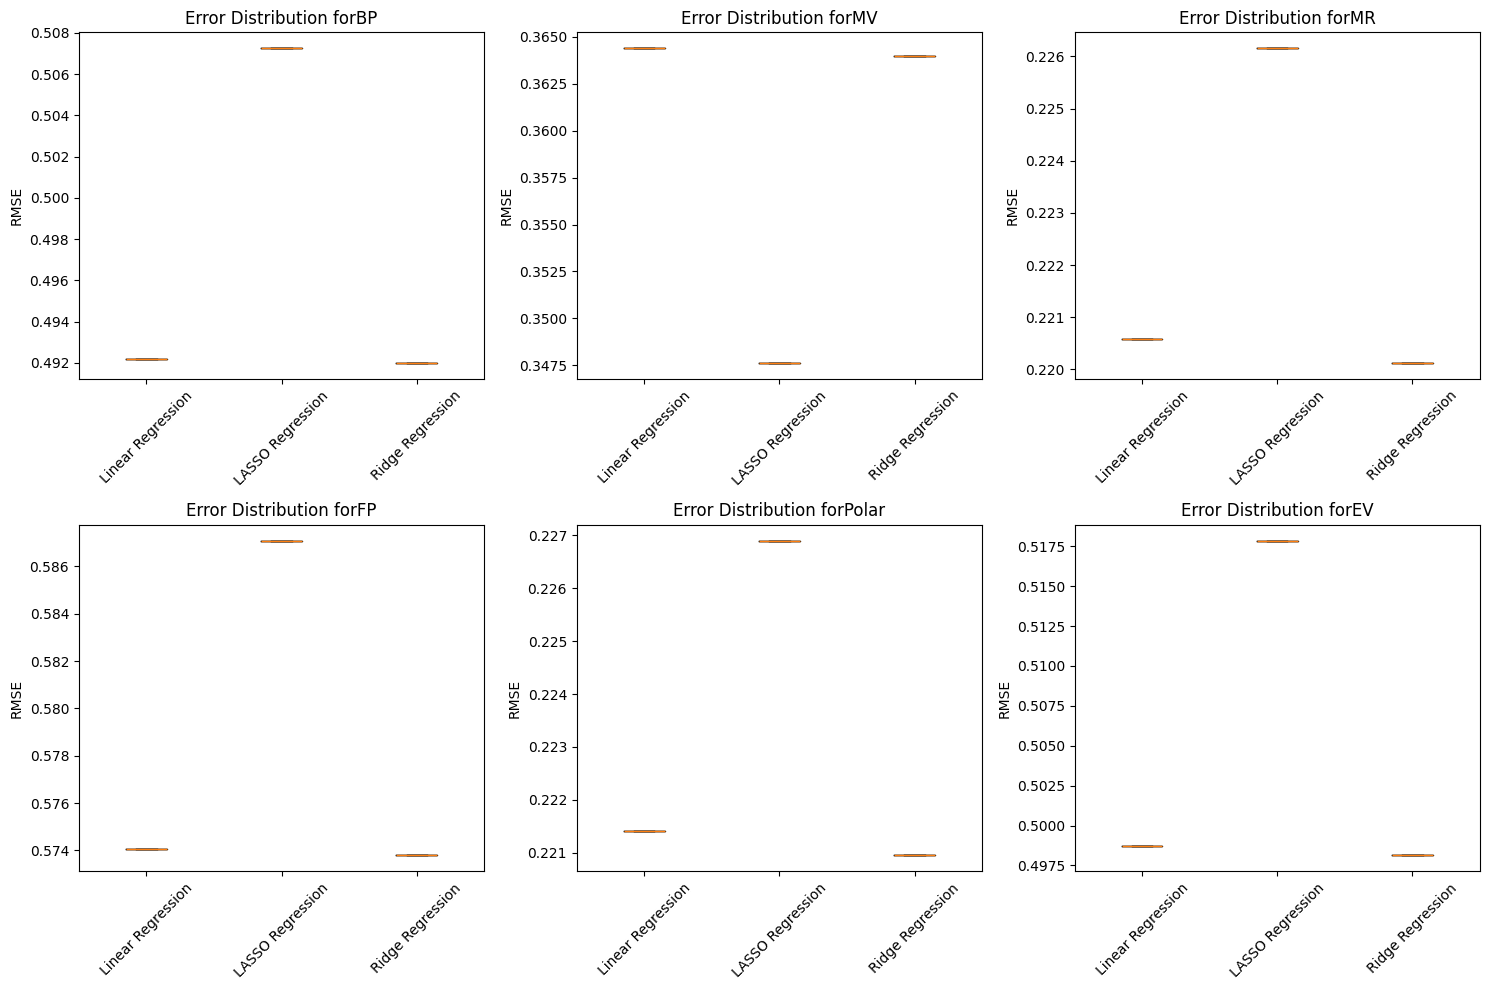

<Figure size 1200x600 with 0 Axes>

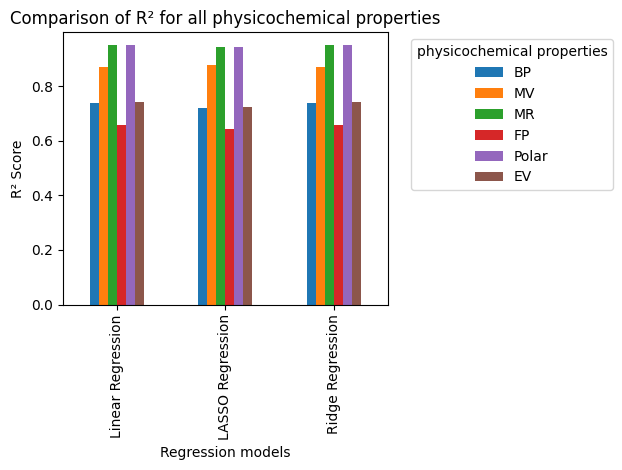

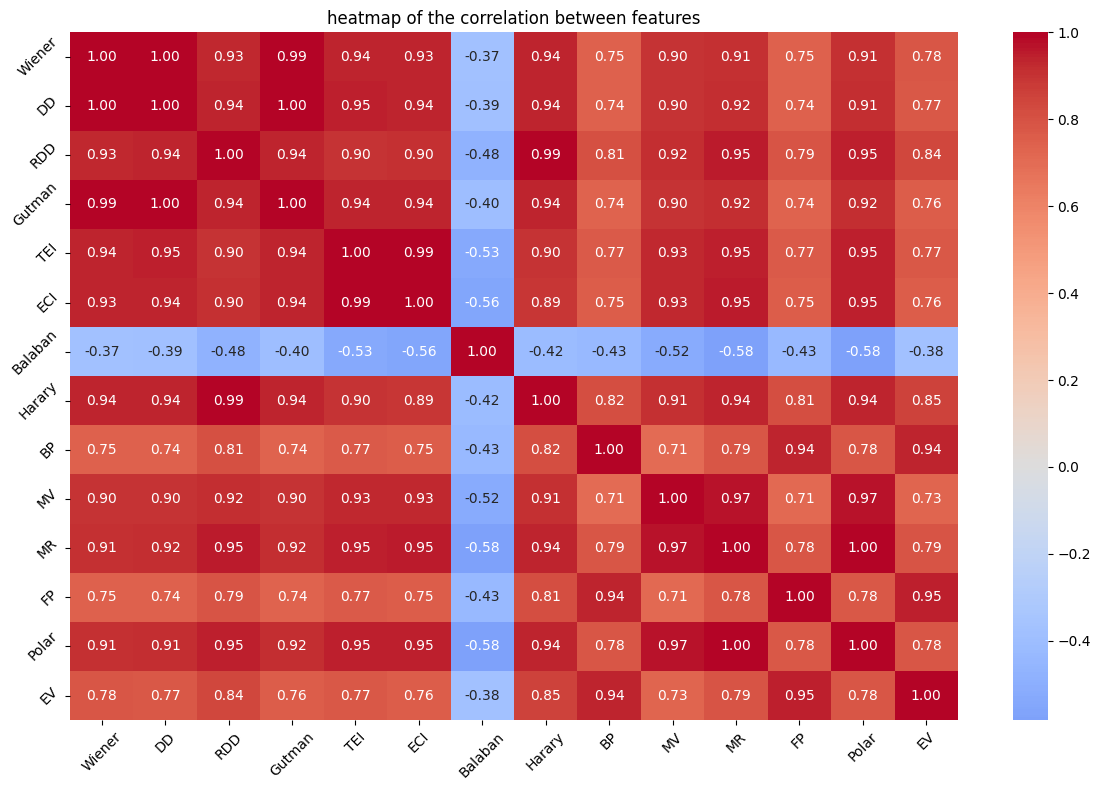

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_results(results, df_filled):
    # 1. Correlation Analysis between Topological and Physicochemical Properties
    plt.figure(figsize=(12, 8))
    correlation_matrix = df_filled[topo_features + physicochem_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('heatmap of the correlation between features')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Compare the performance of the models for each property
    r2_scores = {feature: {model: results[feature][model]['R2']
                          for model in results[feature]}
                 for feature in results}

    plt.figure(figsize=(12, 6))
    df_r2 = pd.DataFrame(r2_scores).T
    df_r2.plot(kind='bar')
    plt.title('Comparison of the coefficient of determination (R²) for each physicochemical property')
    plt.xlabel('physicochemical property')
    plt.ylabel('R² Score')
    plt.legend(title='Regression Models')
    plt.tight_layout()
    plt.show()

    # 3. Comprehensive Analysis Publication
    print("\nComperihensive Analysis of Results:")
    print("=" * 50)

    for feature in physicochem_features:
        print(f"\nAnalysis for{feature}:")

        # the best model
        best_model = max(results[feature].items(),
                        key=lambda x: x[1]['R2'])

        print(f"Best Model: {best_model[0]}")
        print(f"R² Score: {best_model[1]['R2']:.4f}")
        print(f"RMSE: {best_model[1]['RMSE']:.4f}")
        print(f"MAE: {best_model[1]['MAE']:.4f}")

        # Correlation with topological features
        correlations = df_filled[topo_features].corrwith(df_filled[feature]).abs()
        top_correlations = correlations.nlargest(3)
        print("\nThe most important TIs Based on Corrolation:")
        for feat, corr in top_correlations.items():
            print(f"{feat}: {corr:.4f}")

        print("-" * 30)

# implitation of analysis
analyze_results(results, df_filled)
def plot_error_distribution(results, df_filled):
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(physicochem_features, 1):
        plt.subplot(2, 3, i)

        # Creating a list of errors for each model
        model_errors = []
        model_names = []
        for model_name in results[feature]:
            model_errors.append([results[feature][model_name]['RMSE']])
            model_names.append(model_name)

        # Draw a box chart with tick_labels parameter instead of labels
        plt.boxplot(model_errors, tick_labels=model_names)
        plt.title(f'Error Distribution for{feature}')
        plt.xticks(rotation=45)
        plt.ylabel('RMSE')

    plt.tight_layout()
    plt.show()

# Plotting the Fault Distribution
plot_error_distribution(results, df_filled)

# Add R2 Comparison Chart for All Properties
plt.figure(figsize=(12, 6))
r2_scores = {}
for feature in physicochem_features:
    r2_scores[feature] = [results[feature][model]['R2'] for model in results[feature]]

df_r2 = pd.DataFrame(r2_scores, index=['Linear Regression', 'LASSO Regression', 'Ridge Regression'])
df_r2.plot(kind='bar')
plt.title('Comparison of R² for all physicochemical properties')
plt.xlabel('Regression models')
plt.ylabel('R² Score')
plt.legend(title='physicochemical properties', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()



Statistical Analysis of Data Distribution

1. Descriptive Statistics for Physicochemical Properties:
                BP          MV          MR          FP       Polar          EV
count   182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean    595.451780  297.618681  107.273626  314.114670   42.614835   93.478132
std     158.389603  115.282468   39.622934   95.712569   15.648690   21.550681
min     133.080000   58.800000   18.200000   58.100000    7.200000   40.900000
25%     506.275000  234.875000   80.350000  259.200000   32.075000   79.275000
50%     586.300000  291.250000  106.900000  308.700000   42.400000   95.200000
75%     685.700000  358.225000  129.875000  370.700000   51.450000  103.800000
max    1004.400000  811.200000  257.700000  561.300000  102.200000  165.100000

2. Normality Test (Shapiro-Wilk):
H0:  Data is normal
H1:  Data is not normal
------------------------------

BP:
Shapiro-Wilk statistic: 0.9853
p-value: 0.0538
Result: Normal

MV:
Shapir

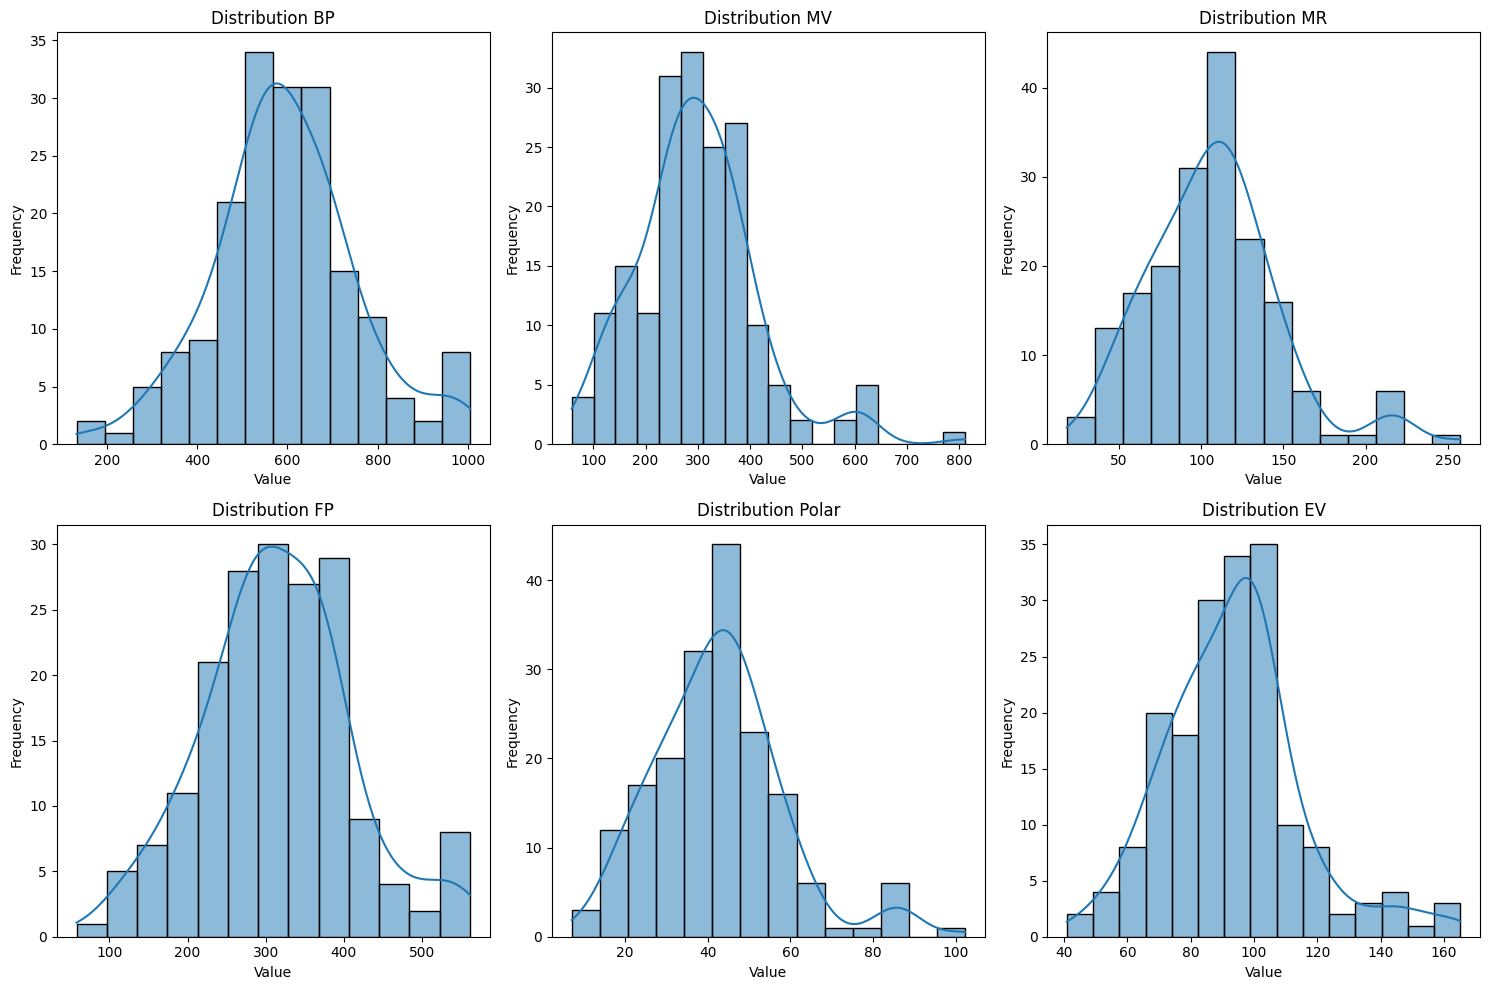

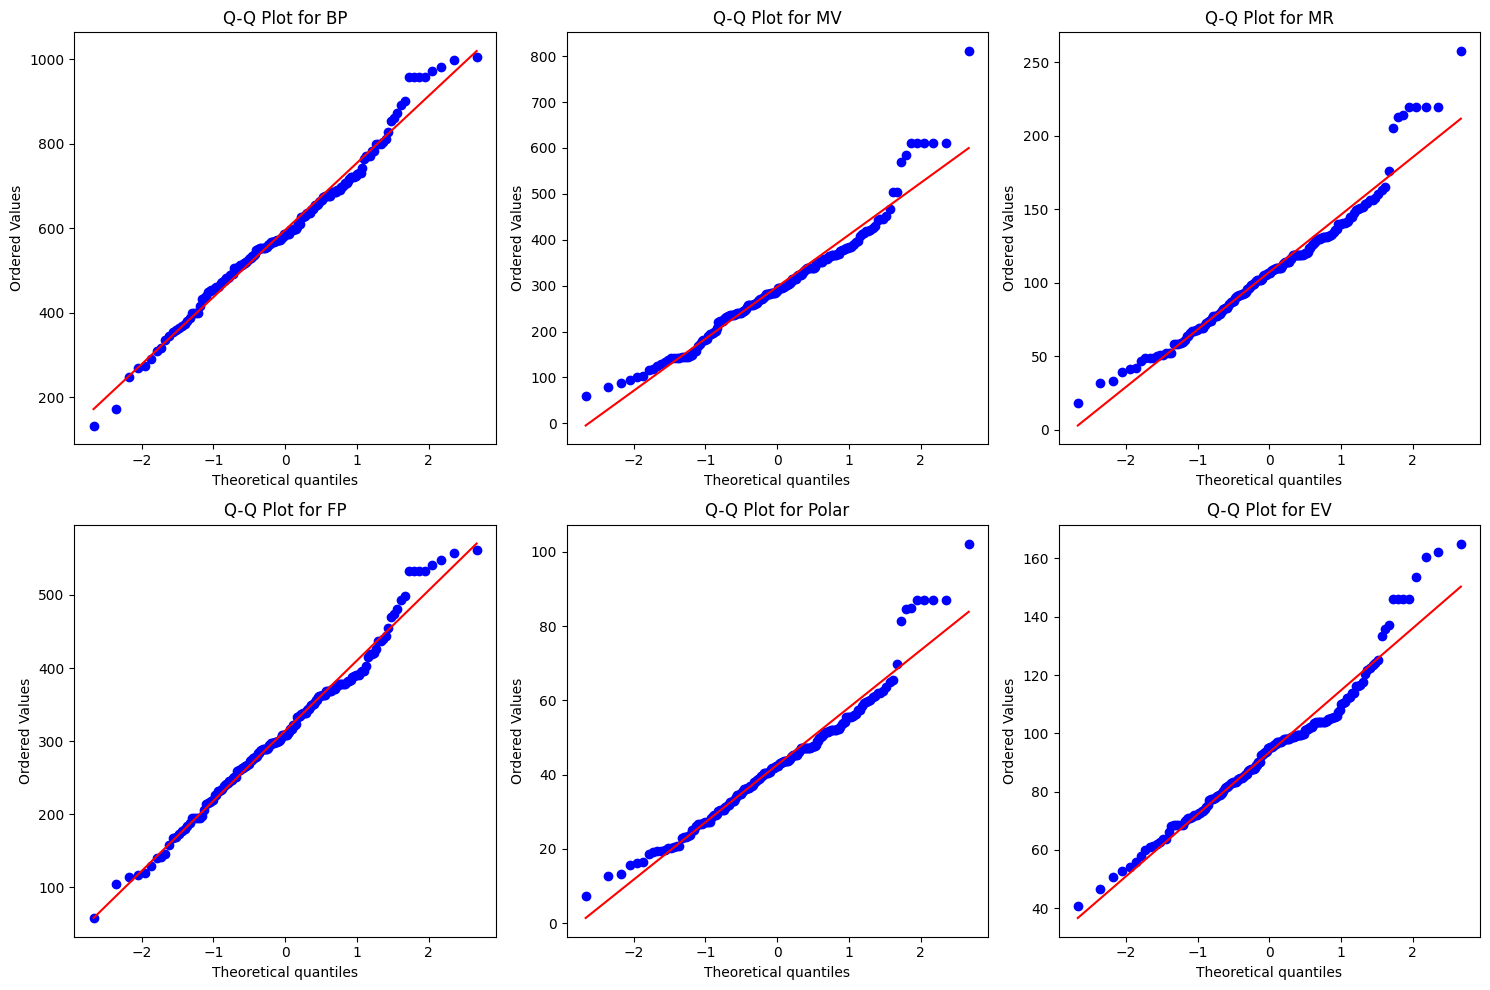

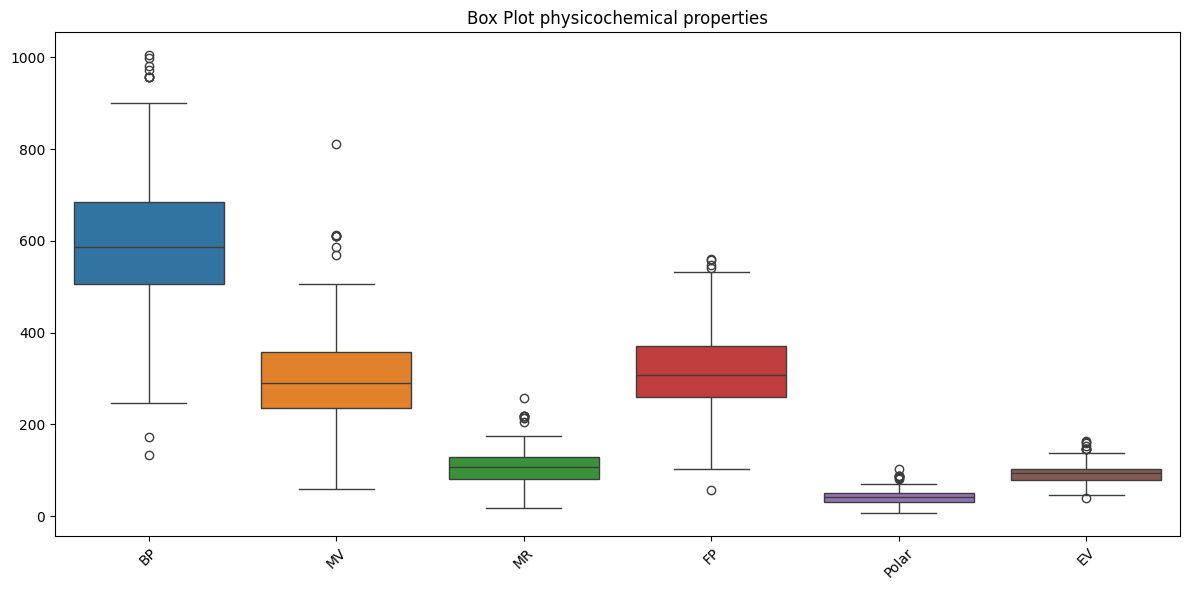


5. Outlier Data Analysis (Z-score > 3 or < -3):

MV:
Number of outliers: 1
Outlier values:
          DRUGS     MV
168  Everolimus  811.2

MR:
Number of outliers: 1
Outlier values:
          DRUGS     MR
168  Everolimus  257.7

Polar:
Number of outliers: 1
Outlier values:
          DRUGS  Polar
168  Everolimus  102.2

EV:
Number of outliers: 3
Outlier values:
          DRUGS     EV
22     Acarbose  160.5
107    Amikacin  162.2
168  Everolimus  165.1


In [ ]:
import scipy.stats as stats
from scipy.stats import shapiro, normaltest

def statistical_analysis(df_filled, topo_features, physicochem_features):
    print("Statistical Analysis of Data Distribution")
    print("=" * 50)

    # 1. Descriptive Statistics
    print("\n1. Descriptive Statistics for Physicochemical Properties:")
    desc_stats = df_filled[physicochem_features].describe()
    print(desc_stats)

    # 2. testing normal
    print("\n2. Normality Test (Shapiro-Wilk):")
    print("H0:  Data is normal")
    print("H1:  Data is not normal")
    print("-" * 30)

    for feature in physicochem_features:
        stat, p_value = shapiro(df_filled[feature])
        print(f"\n{feature}:")
        print(f"Shapiro-Wilk statistic: {stat:.4f}")
        print(f"p-value: {p_value:.4f}")
        print(f"Result: {'Non- Normal' if p_value < 0.05 else 'Normal'}")

    # 3. Spearman correlation (for abnormal data)
    print("\n3. Spearman's correlation between topological and physicochemical properties:")
    spearman_corr = pd.DataFrame(index=topo_features, columns=physicochem_features)

    for topo in topo_features:
        for phys in physicochem_features:
            corr, p_value = stats.spearmanr(df_filled[topo], df_filled[phys])
            spearman_corr.loc[topo, phys] = corr

    print("\nSpearman correlation coefficients:")
    print(spearman_corr)

    # 4. Analysis of variance and dispersion
    print("\n4. Analysis of variance and dispersion:")
    for feature in physicochem_features:
        print(f"\n{feature}:")
        print(f"Variance: {df_filled[feature].var():.4f}")
        print(f"Skewness: {df_filled[feature].skew():.4f}")
        print(f"Kurtosis: {df_filled[feature].kurtosis():.4f}")

    # 5. distribution charts
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(physicochem_features, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df_filled[feature], kde=True)
        plt.title(f'Distribution {feature}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # 6. Q-Q Plot check for normalazation
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(physicochem_features, 1):
        plt.subplot(2, 3, i)
        stats.probplot(df_filled[feature], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot for {feature}')
    plt.tight_layout()
    plt.show()

    # 7. Box Plot To detect outlier data
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_filled[physicochem_features])
    plt.title('Box Plot physicochemical properties')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 8. Outlier Data Analysis
    print("\n5. Outlier Data Analysis (Z-score > 3 or < -3):")
    for feature in physicochem_features:
        z_scores = np.abs(stats.zscore(df_filled[feature]))
        outliers = np.where(z_scores > 3)[0]
        if len(outliers) > 0:
            print(f"\n{feature}:")
            print(f"Number of outliers: {len(outliers)}")
            print("Outlier values:")
            print(df_filled.loc[outliers, ['DRUGS', feature]])

# statistical analysis
statistical_analysis(df_filled, topo_features, physicochem_features)


Processing BP...

RF Results for BP:
Mean Absolute Error (MAE): 58.20
R-squared (R²): 0.51
Root Mean Squared Error (RMSE): 108.49
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Feature Importance:
Harary: 0.5834
Wiener: 0.1138
RDD: 0.0738
Gutman: 0.0674
Balaban: 0.0540
DD: 0.0466
TEI: 0.0388
ECI: 0.0222

XGB Results for BP:
Mean Absolute Error (MAE): 70.26
R-squared (R²): 0.42
Root Mean Squared Error (RMSE): 117.98
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 1.0}
Feature Importance:
Harary: 0.5749
RDD: 0.1287
Wiener: 0.1273
DD: 0.0464
Balaban: 0.0463
TEI: 0.0291
ECI: 0.0240
Gutman: 0.0234

Processing MV...

RF Results for MV:
Mean Absolute Error (MAE): 19.84
R-squared (R²): 0.90
Root Mean Squared Error (RMSE): 25.96
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Feature Importanc

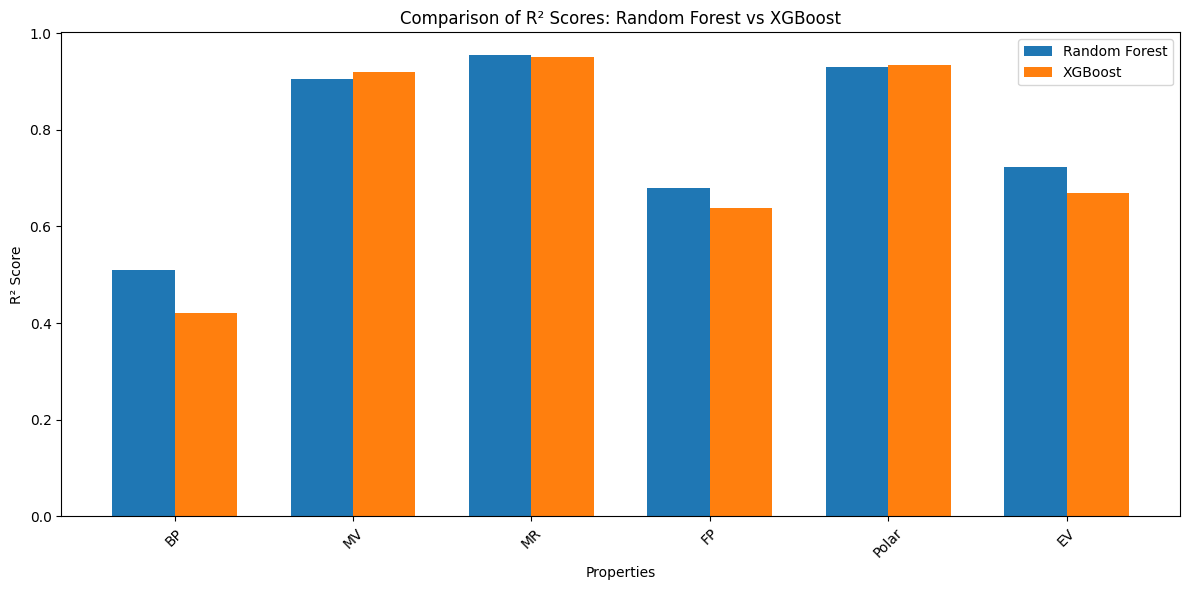

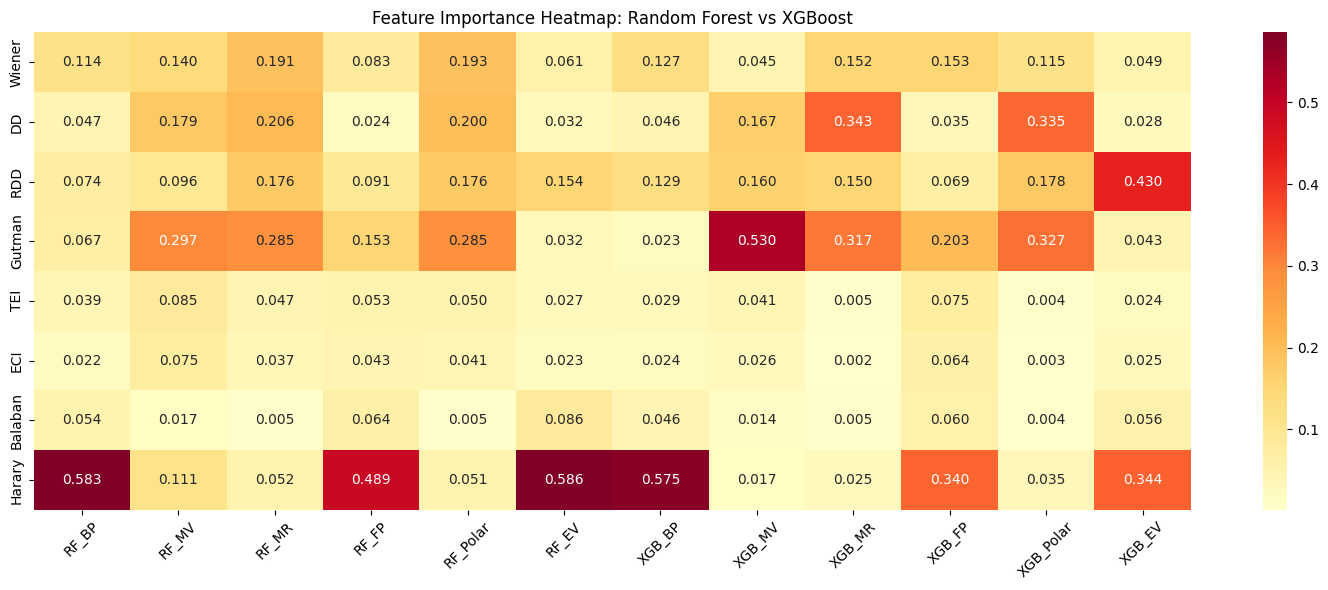

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.impute import KNNImputer
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Selecting input variables
X = df_merged[["Wiener", "DD", "RDD", "Gutman", "TEI", "ECI", "Balaban", "Harary"]]
target_properties = ["BP", "MV", "MR", "FP", "Polar", "EV"]

# Saving results for both models
results = {'RF': {}, 'XGB': {}}

for target in target_properties:
    print(f"\nProcessing {target}...")
    y = df_merged[target]

    # replace the value NaN
    imputer = KNNImputer(n_neighbors=5)
    X_filled = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    y_filled = pd.Series(imputer.fit_transform(y.values.reshape(-1, 1)).flatten(), name=y.name)

    # division of data
    X_train, X_test, y_train, y_test = train_test_split(X_filled, y_filled,
                                                        test_size=0.2,
                                                        random_state=42)

    # 1. Random Forest
    rf_model = RandomForestRegressor(random_state=42)
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_grid_search = GridSearchCV(estimator=rf_model,
                                 param_grid=rf_param_grid,
                                 cv=5,
                                 scoring='neg_mean_absolute_error')
    rf_grid_search.fit(X_train, y_train)
    rf_y_pred = rf_grid_search.predict(X_test)

    # 2. XGBoost
    xgb_model = xgb.XGBRegressor(random_state=42)
    xgb_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    xgb_grid_search = GridSearchCV(estimator=xgb_model,
                                  param_grid=xgb_param_grid,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    xgb_grid_search.fit(X_train, y_train)
    xgb_y_pred = xgb_grid_search.predict(X_test)

    # Evaluating and saving results for both models
    for name, y_pred, grid_search in [('RF', rf_y_pred, rf_grid_search),
                                    ('XGB', xgb_y_pred, xgb_grid_search)]:
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        results[name][target] = {
            "MAE": mae,
            "R2": r2,
            "RMSE": rmse,
            "Best Parameters": grid_search.best_params_,
            "Feature Importance": dict(zip(X.columns,
                grid_search.best_estimator_.feature_importances_))
        }

        print(f"\n{name} Results for {target}:")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"R-squared (R²): {r2:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print("Feature Importance:")
        for feat, imp in sorted(results[name][target]["Feature Importance"].items(),
                              key=lambda x: x[1], reverse=True):
            print(f"{feat}: {imp:.4f}")

# show comprision of results
print("\nComparison of Results:")
comparison = pd.DataFrame({
    f"{model}_{metric}": {prop: results[model][prop][metric]
                         for prop in target_properties}
    for model in ['RF', 'XGB']
    for metric in ['R2', 'MAE', 'RMSE']
}).round(4)

print(comparison)

# draw chart
import matplotlib.pyplot as plt
import seaborn as sns

# compresion R2 scores
plt.figure(figsize=(12, 6))
width = 0.35
x = np.arange(len(target_properties))

plt.bar(x - width/2, [results['RF'][prop]['R2'] for prop in target_properties],
        width, label='Random Forest')
plt.bar(x + width/2, [results['XGB'][prop]['R2'] for prop in target_properties],
        width, label='XGBoost')

plt.xlabel('Properties')
plt.ylabel('R² Score')
plt.title('Comparison of R² Scores: Random Forest vs XGBoost')
plt.xticks(x, target_properties, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap: Importance of Features
plt.figure(figsize=(15, 6))
feature_importance = pd.DataFrame({
    f"{model}_{prop}": results[model][prop]["Feature Importance"]
    for model in ['RF', 'XGB']
    for prop in target_properties
})

sns.heatmap(feature_importance, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Feature Importance Heatmap: Random Forest vs XGBoost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Starting analysis...
Number of samples: 182
Starting preprocessing...

Missing values before imputation:
Wiener      0
DD          0
RDD         0
Gutman      0
TEI         0
ECI         0
Balaban     0
Harary      0
BP         10
MV          0
MR          0
FP         13
Polar       0
EV         13
dtype: int64

Missing values after imputation:
Wiener     0
DD         0
RDD        0
Gutman     0
TEI        0
ECI        0
Balaban    0
Harary     0
BP         0
MV         0
MR         0
FP         0
Polar      0
EV         0
dtype: int64

Analyzing BP...
Fold 1/5
Fold 1 - R²: 0.408, RMSE: 122.134, MAE: 82.343
Fold 2/5
Fold 2 - R²: 0.667, RMSE: 95.636, MAE: 71.892
Fold 3/5


Fold 3 - R²: 0.533, RMSE: 83.193, MAE: 64.474
Fold 4/5
Fold 4 - R²: 0.810, RMSE: 73.123, MAE: 64.400
Fold 5/5
Fold 5 - R²: 0.648, RMSE: 90.213, MAE: 70.729

Average results for BP:
R² Score: 0.613 ± 0.135
RMSE: 92.860
MAE: 70.767

Analyzing MV...
Fold 1/5
Fold 1 - R²: 0.834, RMSE: 34.257, MAE: 28.933
Fold 2/5
Fold 2 - R²: 0.836, RMSE: 37.262, MAE: 29.665
Fold 3/5
Fold 3 - R²: 0.785, RMSE: 56.832, MAE: 45.125
Fold 4/5
Fold 4 - R²: 0.897, RMSE: 45.268, MAE: 33.923
Fold 5/5
Fold 5 - R²: 0.888, RMSE: 34.087, MAE: 26.976

Average results for MV:
R² Score: 0.848 ± 0.041
RMSE: 41.541
MAE: 32.925

Analyzing MR...
Fold 1/5
Fold 1 - R²: 0.911, RMSE: 9.371, MAE: 7.164
Fold 2/5
Fold 2 - R²: 0.904, RMSE: 10.492, MAE: 7.627
Fold 3/5
Fold 3 - R²: 0.900, RMSE: 12.126, MAE: 9.349
Fold 4/5
Fold 4 - R²: 0.966, RMSE: 8.967, MAE: 6.763
Fold 5/5
Fold 5 - R²: 0.951, RMSE: 7.735, MAE: 6.045

Average results for MR:
R² Score: 0.927 ± 0.027
RMSE: 9.738
MAE: 7.389

Analyzing FP...
Fold 1/5
Fold 1 - R²: 0.609, RM

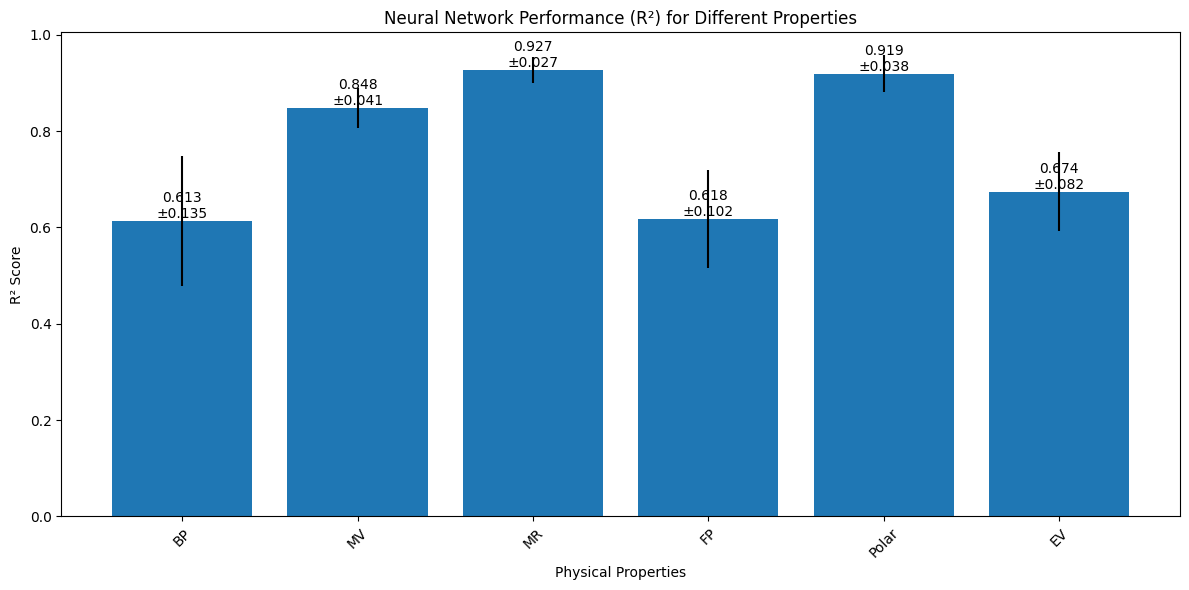

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

def preprocess_data(df, features):
    """Preprocess data and handle NaN values"""
    # Create a copy of the dataframe
    df_processed = df.copy()

    # Check for NaN values before imputation
    print("\nMissing values before imputation:")
    print(df[features].isnull().sum())

    # Impute missing values
    imputer = KNNImputer(n_neighbors=5)
    df_processed[features] = imputer.fit_transform(df[features])

    # Verify no NaN values remain
    print("\nMissing values after imputation:")
    print(df_processed[features].isnull().sum())

    return df_processed

def create_neural_network(input_dim):
    """Create a simple neural network with proper input layer"""
    model = Sequential([
        Input(shape=(input_dim,)),  # Proper input layer
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    return model

def neural_network_analysis(df_merged, topo_features, physicochem_features):
    """Neural network analysis with proper preprocessing"""
    print("Starting preprocessing...")

    # Combine all features for preprocessing
    all_features = topo_features + physicochem_features

    # Preprocess all data
    df_processed = preprocess_data(df_merged, all_features)

    # Prepare features
    X = df_processed[topo_features]
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    # Setup k-fold
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = {}
    histories = {}

    for target in physicochem_features:
        print(f"\nAnalyzing {target}...")
        results[target] = {
            'R2_scores': [],
            'RMSE_scores': [],
            'MAE_scores': []
        }

        y = df_processed[target]
        scaler_y = StandardScaler()
        y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

        fold_histories = []

        for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled)):
            print(f"Fold {fold + 1}/{n_splits}")

            X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
            y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

            # Create and train model
            model = create_neural_network(X_scaled.shape[1])

            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=20,
                restore_best_weights=True
            )

            history = model.fit(
                X_train, y_train,
                epochs=200,
                batch_size=16,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping],
                verbose=0
            )

            # Make predictions
            y_pred = model.predict(X_val, verbose=0)

            # Inverse transform predictions and actual values
            y_val_orig = scaler_y.inverse_transform(y_val)
            y_pred_orig = scaler_y.inverse_transform(y_pred)

            # Calculate metrics
            r2 = r2_score(y_val_orig, y_pred_orig)
            rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
            mae = mean_absolute_error(y_val_orig, y_pred_orig)

            # Store results
            results[target]['R2_scores'].append(r2)
            results[target]['RMSE_scores'].append(rmse)
            results[target]['MAE_scores'].append(mae)

            fold_histories.append(history.history)

            # Print fold results
            print(f"Fold {fold + 1} - R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

        histories[target] = fold_histories

        # Print average results for this target
        print(f"\nAverage results for {target}:")
        print(f"R² Score: {np.mean(results[target]['R2_scores']):.3f} ± {np.std(results[target]['R2_scores']):.3f}")
        print(f"RMSE: {np.mean(results[target]['RMSE_scores']):.3f}")
        print(f"MAE: {np.mean(results[target]['MAE_scores']):.3f}")

    # Plotting results
    plt.figure(figsize=(12, 6))
    r2_means = [np.mean(results[prop]['R2_scores']) for prop in physicochem_features]
    r2_stds = [np.std(results[prop]['R2_scores']) for prop in physicochem_features]

    plt.bar(range(len(physicochem_features)), r2_means, yerr=r2_stds)
    plt.title('Neural Network Performance (R²) for Different Properties')
    plt.xlabel('Physical Properties')
    plt.ylabel('R² Score')
    plt.xticks(range(len(physicochem_features)), physicochem_features, rotation=45)

    for idx, (mean, std) in enumerate(zip(r2_means, r2_stds)):
        plt.text(idx, mean, f'{mean:.3f}\n±{std:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return results, histories

# Run the analysis
print("Starting analysis...")
print("Number of samples:", len(df_merged))
results_nn, histories_nn = neural_network_analysis(df_merged, topo_features, physicochem_features)

Starting analysis...
Number of samples: 182
Starting preprocessing...

Missing values before imputation:
Wiener      0
DD          0
RDD         0
Gutman      0
TEI         0
ECI         0
Balaban     0
Harary      0
BP         10
MV          0
MR          0
FP         13
Polar       0
EV         13
dtype: int64

Missing values after imputation:
Wiener     0
DD         0
RDD        0
Gutman     0
TEI        0
ECI        0
Balaban    0
Harary     0
BP         0
MV         0
MR         0
FP         0
Polar      0
EV         0
dtype: int64

Analyzing BP...
Fold 1/5
Fold 1 - R²: 0.429, RMSE: 120.838, MAE: 78.981
Fold 2/5
Fold 2 - R²: 0.673, RMSE: 94.756, MAE: 71.417
Fold 3/5
Fold 3 - R²: 0.491, RMSE: 87.452, MAE: 67.491
Fold 4/5
Fold 4 - R²: 0.854, RMSE: 64.981, MAE: 49.938
Fold 5/5
Fold 5 - R²: 0.675, RMSE: 87.320, MAE: 67.089

Average results for BP:
R² Score: 0.624 ± 0.151
RMSE: 91.070
MAE: 66.983

Analyzing MV...
Fold 1/5
Fold 1 - R²: 0.853, RMSE: 32.239, MAE: 28.029
Fold 2/5
Fold 2 - 

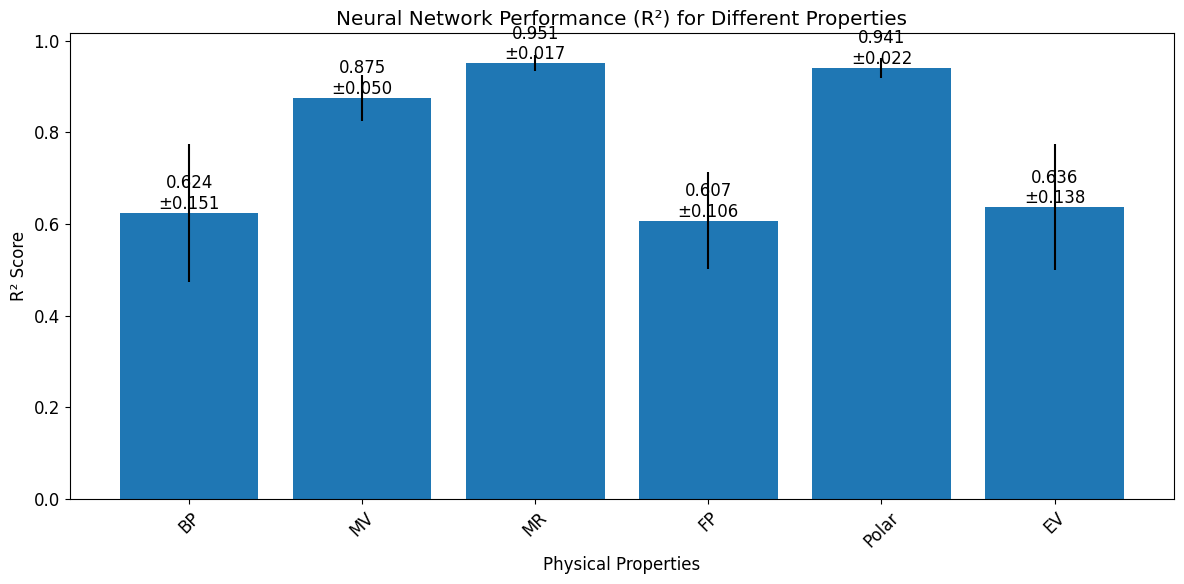

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

def preprocess_data(df, features):
    """Preprocess data and handle NaN values"""
    # Create a copy of the dataframe
    df_processed = df.copy()

    # Check for NaN values before imputation
    print("\nMissing values before imputation:")
    print(df[features].isnull().sum())

    # Impute missing values
    imputer = KNNImputer(n_neighbors=5)
    df_processed[features] = imputer.fit_transform(df[features])

    # Verify no NaN values remain
    print("\nMissing values after imputation:")
    print(df_processed[features].isnull().sum())

    return df_processed

def create_neural_network(input_dim):
    """Create a simple neural network with proper input layer"""
    model = Sequential([
        Input(shape=(input_dim,)),  # Proper input layer
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    return model

def neural_network_analysis(df_merged, topo_features, physicochem_features):
    """Neural network analysis with proper preprocessing"""
    print("Starting preprocessing...")

    # Combine all features for preprocessing
    all_features = topo_features + physicochem_features

    # Preprocess all data
    df_processed = preprocess_data(df_merged, all_features)

    # Prepare features
    X = df_processed[topo_features]
    scaler_X = StandardScaler()
    X_scaled = scaler_X.fit_transform(X)

    # Setup k-fold
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = {}
    histories = {}

    for target in physicochem_features:
        print(f"\nAnalyzing {target}...")
        results[target] = {
            'R2_scores': [],
            'RMSE_scores': [],
            'MAE_scores': []
        }

        y = df_processed[target]
        scaler_y = StandardScaler()
        y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

        fold_histories = []

        for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled)):
            print(f"Fold {fold + 1}/{n_splits}")

            X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
            y_train, y_val = y_scaled[train_idx], y_scaled[val_idx]

            # Create and train model
            model = create_neural_network(X_scaled.shape[1])

            early_stopping = EarlyStopping(
                monitor='val_loss',
                patience=20,
                restore_best_weights=True
            )

            history = model.fit(
                X_train, y_train,
                epochs=200,
                batch_size=16,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping],
                verbose=0
            )

            # Make predictions
            y_pred = model.predict(X_val, verbose=0)

            # Inverse transform predictions and actual values
            y_val_orig = scaler_y.inverse_transform(y_val)
            y_pred_orig = scaler_y.inverse_transform(y_pred)

            # Calculate metrics
            r2 = r2_score(y_val_orig, y_pred_orig)
            rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
            mae = mean_absolute_error(y_val_orig, y_pred_orig)

            # Store results
            results[target]['R2_scores'].append(r2)
            results[target]['RMSE_scores'].append(rmse)
            results[target]['MAE_scores'].append(mae)

            fold_histories.append(history.history)

            # Print fold results
            print(f"Fold {fold + 1} - R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

        histories[target] = fold_histories

        # Print average results for this target
        print(f"\nAverage results for {target}:")
        print(f"R² Score: {np.mean(results[target]['R2_scores']):.3f} ± {np.std(results[target]['R2_scores']):.3f}")
        print(f"RMSE: {np.mean(results[target]['RMSE_scores']):.3f}")
        print(f"MAE: {np.mean(results[target]['MAE_scores']):.3f}")

    # Plotting results
    plt.figure(figsize=(12, 6))
    r2_means = [np.mean(results[prop]['R2_scores']) for prop in physicochem_features]
    r2_stds = [np.std(results[prop]['R2_scores']) for prop in physicochem_features]

    plt.bar(range(len(physicochem_features)), r2_means, yerr=r2_stds)
    plt.title('Neural Network Performance (R²) for Different Properties')
    plt.xlabel('Physical Properties')
    plt.ylabel('R² Score')
    plt.xticks(range(len(physicochem_features)), physicochem_features, rotation=45)

    for idx, (mean, std) in enumerate(zip(r2_means, r2_stds)):
        plt.text(idx, mean, f'{mean:.3f}\n±{std:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    return results, histories

# Run the analysis
print("Starting analysis...")
print("Number of samples:", len(df_merged))
results_nn, histories_nn = neural_network_analysis(df_merged, topo_features, physicochem_features)